

# INTRODUCTION

In this notebook, I explored a sample healthcare dataset using Python, focusing on data cleaning, manipulation, and exploratory data analysis (EDA). During the project, I identified and handled missing values, corrected data types, and created new features to better understand the dataset. Through EDA, I visualized trends, distributions, and relationships between key variables, gaining insights into patterns within the healthcare data.

The link to the dataset can be found [here](https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data). 

Title: **Healthcare Data Analysis in Python**

Author: Abdullahi Mohamed

Date: 4 April 2025

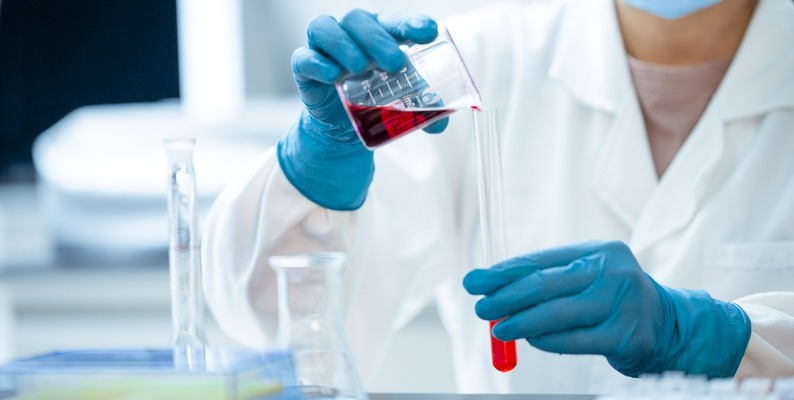

## 1. Prepare 

In [217]:
# Importing relevant libraries for data manipulation, arrays, dates, and plotting. 

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
# Import the CSV file

healthcare = pd.read_csv(r"C:\Users\abdul\Downloads\healthcare_dataset.csv\healthcare_dataset.csv")

In [219]:
# Lets take a look at the data. 

healthcare

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [220]:
# The column names are in sentence case and have white spaces. Let's make the column names lowercase for easy querying. 

healthcare.columns = healthcare.columns.str.lower()

healthcare.head(10)

,name,age,gender,blood type,medical condition,date of admission,doctor,hospital,insurance provider,billing amount,room number,admission type,discharge date,medication,test results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [221]:
# Replace spaces in column names with underscores for consistency and readability

healthcare = healthcare.rename(columns= {'blood type': 'blood_type', 
                                         'medical condition': 'medical_condition', 
                                         'date of admission': 'admission_date', 
                                         'insurance provider': 'insurance_provider', 
                                         'billing amount': 'billing_amount',
                                         'room number': 'room_number',
                                         'admission type': 'admission_type', 
                                         'discharge date': 'discharge_date', 'test results': 'test_result'})
healthcare.columns

Index(['name', 'age', 'gender', 'blood_type', 'medical_condition',
       'admission_date', 'doctor', 'hospital', 'insurance_provider',
       'billing_amount', 'room_number', 'admission_type', 'discharge_date',
       'medication', 'test_result'],
      dtype='object')

In [222]:
# Check for the size of the data set.

healthcare.shape

(55500, 15)

In [223]:
# Check for missing values

missing_value_counts = healthcare.isnull().sum()

print(missing_value_counts)

name                  0
age                   0
gender                0
blood_type            0
medical_condition     0
admission_date        0
doctor                0
hospital              0
insurance_provider    0
billing_amount        0
room_number           0
admission_type        0
discharge_date        0
medication            0
test_result           0
dtype: int64


In [237]:
# Drop duplicate data from the data set

healthcare_clean = healthcare.drop_duplicates()

healthcare_clean.shape

(54966, 16)

In [238]:
# Check datatypes of columns

healthcare_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54966 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   name                54966 non-null  object         
 1   age                 54966 non-null  int64          
 2   gender              54966 non-null  object         
 3   blood_type          54966 non-null  object         
 4   medical_condition   54966 non-null  object         
 5   admission_date      54966 non-null  datetime64[ns] 
 6   doctor              54966 non-null  object         
 7   hospital            54966 non-null  object         
 8   insurance_provider  54966 non-null  object         
 9   billing_amount      54966 non-null  float64        
 10  room_number         54966 non-null  int64          
 11  admission_type      54966 non-null  object         
 12  discharge_date      54966 non-null  datetime64[ns] 
 13  medication          54966 non-n

In [239]:
# 'date of admission' and 'dischange date' need to be change to a date dtype

healthcare_clean['admission_date'] = pd.to_datetime(healthcare_clean['admission_date'])
healthcare_clean['discharge_date'] = pd.to_datetime(healthcare_clean['discharge_date'])

print(healthcare_clean['admission_date'].dtype)
print(healthcare_clean['discharge_date'].dtype)

datetime64[ns]
datetime64[ns]


In [240]:
# Formating the name column so only the first and last name are uppercase

healthcare_clean['name'] = healthcare_clean['name'].str.title()

healthcare_clean.head()

,name,age,gender,blood_type,medical_condition,admission_date,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_result,length_of_stay
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,2 days
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6 days
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,15 days
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,30 days
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,20 days


In [241]:
# Creating a length_of_stay column 

healthcare_clean['length_of_stay'] = healthcare_clean['discharge_date'] - healthcare_clean['admission_date']

print(healthcare_clean['length_of_stay'])


0        2 days
1        6 days
2       15 days
3       30 days
4       20 days
          ...  
55495   30 days
55496    9 days
55497   28 days
55498    6 days
55499   27 days
Name: length_of_stay, Length: 54966, dtype: timedelta64[ns]


In [242]:
# Rounding the billing_amount column to 2 decimals

healthcare_clean['billing_amount'] = round(healthcare_clean['billing_amount'], 2)

print(healthcare_clean['billing_amount'])

0        18856.28
1        33643.33
2        27955.10
3        37909.78
4        14238.32
           ...   
55495     2650.71
55496    31457.80
55497    27620.76
55498    32451.09
55499     4010.13
Name: billing_amount, Length: 54966, dtype: float64


## 2. Analyze 

In [243]:
# Exploring the billing amount for different medical conditions by gender

round(healthcare_clean.groupby(['medical_condition', 'gender'])[['age', 'billing_amount']].mean(), 2)

age  billing_amount
medical_condition gender                       
Arthritis         Female  51.41        25337.23
                  Male    51.67        25688.85
Asthma            Female  51.70        25358.63
                  Male    51.50        25903.91
Cancer            Female  51.33        25284.31
                  Male    51.76        25020.56
Diabetes          Female  51.60        25558.06
                  Male    51.56        25762.94
Hypertension      Female  52.14        25434.79
                  Male    51.30        25571.14
Obesity           Female  51.33        25871.07
                  Male    51.13        25737.65

In [244]:
# Exploring the billing amount by insurance provider

round(healthcare_clean.groupby(['insurance_provider'])[['age', 'billing_amount']].mean(), 2)

,age,billing_amount
insurance_provider,,
Aetna,51.68,25549.69
Blue Cross,51.70,25603.46
Cigna,51.43,25526.00
Medicare,51.40,25628.32
UnitedHealthcare,51.47,25414.51


In [245]:
# Cross tabulate the medical condition by gender

pd.crosstab(healthcare_clean['gender'], healthcare_clean['medical_condition'])

medical_condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
gender,,,,,,
Female,4642,4511,4566,4609,4569,4573
Male,4576,4584,4574,4607,4582,4573


In [247]:
# Cross tabulate the medical condition by medication

crosstab = pd.crosstab(healthcare_clean['medication'], healthcare_clean['medical_condition'])
crosstab

medical_condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
medication,,,,,,
Aspirin,1901,1781,1768,1836,1845,1853
Ibuprofen,1805,1802,1862,1846,1874,1834
Lipitor,1810,1814,1904,1875,1823,1812
Paracetamol,1858,1870,1829,1794,1839,1775
Penicillin,1844,1828,1777,1865,1770,1872


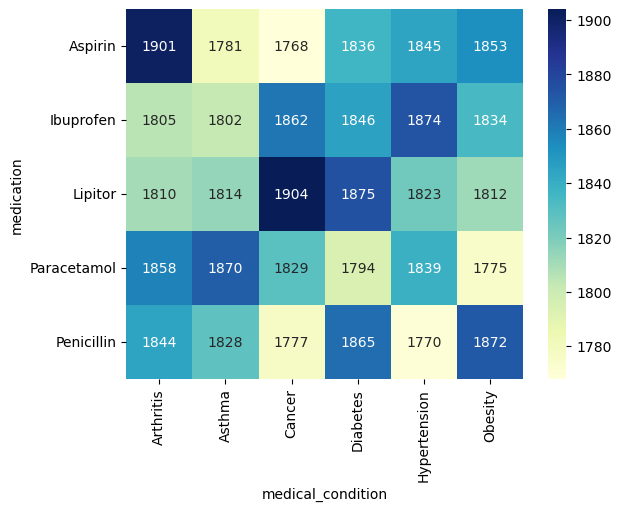

In [248]:
# Plotting a heatmap of the crosstab
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', cbar=True, fmt='d')
plt.show()

In [249]:
# Finding the average length of stay by hospital

grouped_avg = healthcare_clean.groupby(['hospital'])['length_of_stay'].mean().reset_index()
grouped_avg = grouped_avg.sort_values(by='length_of_stay', ascending=False)
grouped_avg

,hospital,length_of_stay
19938,Mcdaniel-Castaneda,30 days
11772,Harris-Snyder,30 days
36649,"and Harvey Reynolds Brooks,",30 days
25130,Powell-Garcia,30 days
2185,"Bishop and Fitzpatrick, Craig",30 days
...,...,...
17573,"Lewis, and Stone Beck",1 days
17585,Lewis-Bush,1 days
17599,Lewis-Hale,1 days
17602,Lewis-Howard,1 days


In [250]:
# Finding the average length of stay by medical condition

medgrouped_avg = healthcare_clean.groupby(['medical_condition'])['length_of_stay'].mean().reset_index()
medgrouped_avg = medgrouped_avg.sort_values(by='length_of_stay', ascending=False)
medgrouped_avg

,medical_condition,length_of_stay
1,Asthma,15 days 16:15:18.306761957
0,Arthritis,15 days 12:06:05.545671512
2,Cancer,15 days 12:01:43.982494529
5,Obesity,15 days 10:44:35.005466870
4,Hypertension,15 days 10:28:10.831603103
3,Diabetes,15 days 10:20:09.375000


## 3. Key Findings/Conclusion

After cleaning and exploring the sample healthcare dataset, I found that the data had **very little variability** — many features contained identical or nearly identical values. Because of this, it wasn’t possible to uncover meaningful trends, patterns, or relationships between variables.

This experience reinforced the importance of **checking data quality early in a project**. In future projects, I would perform a quick initial scan of the dataset (e.g., checking for variability, distribution, and uniqueness of values) before committing time to deeper analysis. This would help ensure that the dataset is suitable for meaningful exploration and insight generation.